## AULA 4
### Trabalhando com Datetime e Melt
#### SOURCES: SUS E IBGE

In [1]:
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format

In [29]:
df_gastos_sus = pd.read_csv('https://raw.githubusercontent.com/ibzoo/Bootcamp-DATA-SCIENCE/main/A160324189_28_143_208.csv', encoding = 'ISO-8859-1', 
                         skiprows = 3, skipfooter = 12, sep=';', thousands = '.', decimal = ',',engine="python")
df_gastos_sus.head(2)

,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,...,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,11 Rondônia,-,-,-,-,-,-,-,-,-,...,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,3556381.57,929129659.72
1,12 Acre,-,-,-,-,-,-,-,-,-,...,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,-,420668039.63


In [3]:
df_gastos_sus.set_index('Unidade da Federação', inplace = True)
gastos_mais_recente = df_gastos_sus.columns[-3]
gastos_sus = df_gastos_sus[gastos_mais_recente]
display(type(gastos_sus))
display(gastos_sus)

pandas.core.series.Series

Unidade da Federação
11 Rondônia                7407388.24
12 Acre                    1163813.08
13 Amazonas               13358514.02
14 Roraima                 2739498.41
15 Pará                   27618727.51
16 Amapá                   2155083.37
17 Tocantins               4489665.87
21 Maranhão               24374205.15
22 Piauí                  18019214.49
23 Ceará                  30809221.22
24 Rio Grande do Norte    19593057.45
25 Paraíba                15491469.06
26 Pernambuco             62325444.34
27 Alagoas                13087850.40
28 Sergipe                 3312766.32
29 Bahia                  58898100.40
31 Minas Gerais          120467187.34
32 Espírito Santo         27460475.47
33 Rio de Janeiro         71540227.33
35 São Paulo             282709570.31
41 Paraná                 80320852.69
42 Santa Catarina         51764534.76
43 Rio Grande do Sul      78929703.81
50 Mato Grosso do Sul     12508717.35
51 Mato Grosso            13083151.70
52 Goiás                  334

In [4]:
gastos_sus_rel = gastos_sus / gastos_sus.sum()
gastos_sus_rel = gastos_sus_rel.sort_values(ascending = False)
gastos_sus_rel

Unidade da Federação
35 São Paulo             0.26
31 Minas Gerais          0.11
41 Paraná                0.07
43 Rio Grande do Sul     0.07
33 Rio de Janeiro        0.07
26 Pernambuco            0.06
29 Bahia                 0.05
42 Santa Catarina        0.05
52 Goiás                 0.03
23 Ceará                 0.03
15 Pará                  0.03
32 Espírito Santo        0.02
21 Maranhão              0.02
53 Distrito Federal      0.02
24 Rio Grande do Norte   0.02
22 Piauí                 0.02
25 Paraíba               0.01
13 Amazonas              0.01
27 Alagoas               0.01
51 Mato Grosso           0.01
50 Mato Grosso do Sul    0.01
11 Rondônia              0.01
17 Tocantins             0.00
28 Sergipe               0.00
14 Roraima               0.00
16 Amapá                 0.00
12 Acre                  0.00
Name: 2020/Jul, dtype: float64

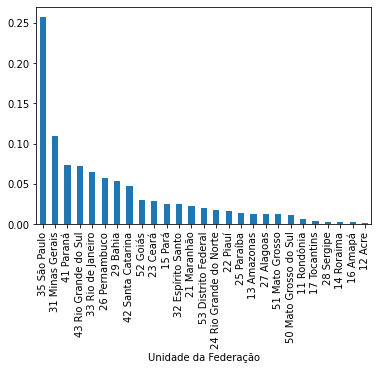

In [5]:
gastos_sus_rel.plot(kind = 'bar');

### Desafio 01 - Entre nos dados do wikipedia e Leia a Base de dados direto do wikipedia.

In [6]:
dados_tabela = pd.read_html('https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o')
populacao = pd.DataFrame(dados_tabela[0])
populacao

,Posição,Unidade federativa,População,% da pop. total,País comparável (habitantes)
0,1,São Paulo,46 289 333,"21,9%",Espanha (46 439 864)
1,2,Minas Gerais,21 292 666,"10,1%",Sri Lanka (20 675 000)
2,3,Rio de Janeiro,17 366 189,"8,2%",Países Baixos (16 922 900)
3,4,Bahia,14 930 634,"7,1%",Chade (14 037 000)
4,5,Paraná,11 516 840,"5,4%",Bolívia (11 410 651)
5,6,Rio Grande do Sul,11 422 973,"5,4%",Bélgica (11 250 659)
6,7,Pernambuco,9 616 621,"4,5%",Bielorrússia (9 485 300)
7,8,Ceará,9 187 103,"4,3%",Emirados Árabes Unidos (9 157 000)
8,9,Pará,8 690 745,"4,1%",Áustria (8 602 112)
9,10,Santa Catarina,7 252 502,"3,4%",Sérvia (7 114 393)


#### Desafio 02 - Neste desafio temos uma série de passos:

##### Padronizar os nomes das colunas
##### Transformar os dados nos tipos corretos
##### Transformar a UF em index

In [7]:
#Tratamento dos dados
nova_populacao = populacao[['Unidade federativa','População']]

#Padronizar as colunas
nova_populacao.rename(columns={'Unidade federativa':'UF', 'População':'Populacao'}, inplace = True)

#Transformar os dados nos tipos corretos
nova_populacao['Populacao'] = nova_populacao['Populacao'].str.replace(' ','').astype(int)

#Transformar a UF em index
nova_populacao = nova_populacao.set_index('UF')
nova_populacao

,Populacao
UF,
São Paulo,46289333
Minas Gerais,21292666
Rio de Janeiro,17366189
Bahia,14930634
Paraná,11516840
Rio Grande do Sul,11422973
Pernambuco,9616621
Ceará,9187103
Pará,8690745


In [8]:
#1 tentativa join SEM SUCESSO
nova_populacao.join(gastos_sus)

,Populacao,2020/Jul
UF,,
São Paulo,46289333,NaN
Minas Gerais,21292666,NaN
Rio de Janeiro,17366189,NaN
Bahia,14930634,NaN
Paraná,11516840,NaN
Rio Grande do Sul,11422973,NaN
Pernambuco,9616621,NaN
Ceará,9187103,NaN
Pará,8690745,NaN


In [9]:
#Tratamento do indice df GASTOS_SUS
display(gastos_sus.index.str[3:]) #slice do texto
gastos_sus.index = gastos_sus.index.str[3:]
gastos_sus

Index(['Rondônia', 'Acre', 'Amazonas', 'Roraima', 'Pará', 'Amapá', 'Tocantins',
       'Maranhão', 'Piauí', 'Ceará', 'Rio Grande do Norte', 'Paraíba',
       'Pernambuco', 'Alagoas', 'Sergipe', 'Bahia', 'Minas Gerais',
       'Espírito Santo', 'Rio de Janeiro', 'São Paulo', 'Paraná',
       'Santa Catarina', 'Rio Grande do Sul', 'Mato Grosso do Sul',
       'Mato Grosso', 'Goiás', 'Distrito Federal'],
      dtype='object', name='Unidade da Federação')

Unidade da Federação
Rondônia                7407388.24
Acre                    1163813.08
Amazonas               13358514.02
Roraima                 2739498.41
Pará                   27618727.51
Amapá                   2155083.37
Tocantins               4489665.87
Maranhão               24374205.15
Piauí                  18019214.49
Ceará                  30809221.22
Rio Grande do Norte    19593057.45
Paraíba                15491469.06
Pernambuco             62325444.34
Alagoas                13087850.40
Sergipe                 3312766.32
Bahia                  58898100.40
Minas Gerais          120467187.34
Espírito Santo         27460475.47
Rio de Janeiro         71540227.33
São Paulo             282709570.31
Paraná                 80320852.69
Santa Catarina         51764534.76
Rio Grande do Sul      78929703.81
Mato Grosso do Sul     12508717.35
Mato Grosso            13083151.70
Goiás                  33499284.38
Distrito Federal       22233542.26
Name: 2020/Jul, dtype: float64

In [10]:
# 2 tentativa do join
gastos_populacao_recente = nova_populacao.join(gastos_sus)

### Desafio 04 - Desenvolver uma função para a limpeza e tratamento dos dados, retornando duas tabelas "população" e "unida".

In [11]:
# criar funcao
def clearEtl():
    dados_tabela = pd.read_html('https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o')
    populacao = pd.DataFrame(dados_tabela[0])
    
    #Tratamento dos dados
    nova_populacao = populacao[['Unidade federativa','População']]

    #Padronizar as colunas
    nova_populacao.rename(columns={'Unidade federativa':'UF', 'População':'Populacao'}, inplace = True)

    #Transformar os dados nos tipos corretos
    nova_populacao['Populacao'] = nova_populacao['Populacao'].str.replace(' ','').astype(int)

    #Transformar a UF em index
    nova_populacao = nova_populacao.set_index('UF')
    
    #Tratamento do indice df GASTOS_SUS
    gastos_sus.index = gastos_sus.index.str[3:]
    
    gastos_populacao_recente = nova_populacao.join(gastos_sus)
    
    return  nova_populacao, gastos_populacao_recente

In [12]:
df,dd = clearEtl()

In [13]:
gastos_populacao_recente

,Populacao,2020/Jul
UF,,
São Paulo,46289333,282709570.31
Minas Gerais,21292666,120467187.34
Rio de Janeiro,17366189,71540227.33
Bahia,14930634,58898100.40
Paraná,11516840,80320852.69
Rio Grande do Sul,11422973,78929703.81
Pernambuco,9616621,62325444.34
Ceará,9187103,30809221.22
Pará,8690745,27618727.51


#### Desafio 01: Ordenar o gráfico e criar uma visualização de gastos por habitantes ordenada.

<AxesSubplot:xlabel='UF'>

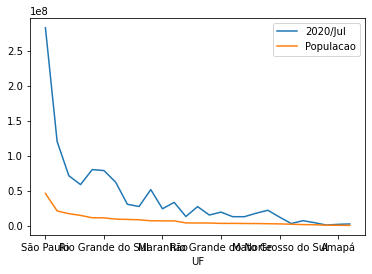

In [14]:
# horripilante (data visualization)
gastos_populacao_recente[["2020/Jul", "Populacao"]].plot()

In [15]:
gastos_populacao_recente["gasto_por_habitante"] = gastos_populacao_recente["2020/Jul"] / gastos_populacao_recente["Populacao"]

In [16]:
gastos_populacao_recente.head()

,Populacao,2020/Jul,gasto_por_habitante
UF,,,
São Paulo,46289333,282709570.31,6.11
Minas Gerais,21292666,120467187.34,5.66
Rio de Janeiro,17366189,71540227.33,4.12
Bahia,14930634,58898100.40,3.94
Paraná,11516840,80320852.69,6.97


In [17]:
gastos_populacao_recente.loc[["Rio Grande do Sul", "São Paulo"]]

,Populacao,2020/Jul,gasto_por_habitante
UF,,,
Rio Grande do Sul,11422973,78929703.81,6.91
São Paulo,46289333,282709570.31,6.11


<AxesSubplot:xlabel='UF'>

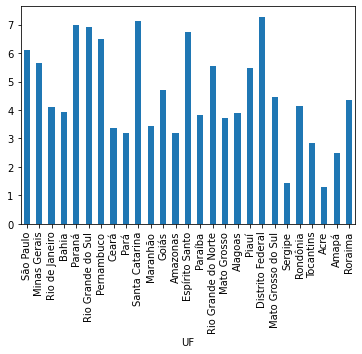

In [18]:
gastos_populacao_recente["gasto_por_habitante"].plot(kind='bar')

#### Desafio 01: Ordenar o gráfico e criar uma visualização de gastos por habitantes ordenada.

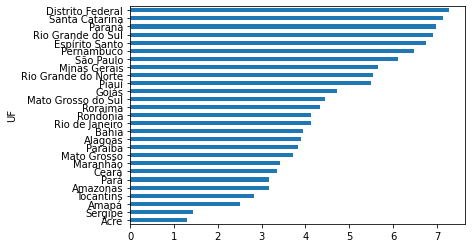

In [19]:
gastos_populacao_recente["gasto_por_habitante"].sort_values(ascending = True).plot(kind='barh');

#### Desafio 02 (Super Desafio Gui): Fazer os mesmos gráficos do final da aulas 2.1 para meses anteriores, analisar e compartilhar suas hipóteses.

In [20]:
gasto_historico = df_gastos_sus.columns[-9:-4]
desafio1 = df_gastos_sus[gasto_historico]
#Tratamento do indice df GASTOS_SUS
desafio1.index = desafio1.index.str[3:]
desafio1.head()

,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai
Unidade da Federação,,,,,
Rondônia,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13
Acre,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48
Amazonas,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53
Roraima,3084561.08,2967159.04,2813954.05,2304961.42,2910776.44
Pará,37009819.17,34635702.52,34749098.46,28714969.96,41248502.78


In [21]:
desafio1 = desafio1.join(gastos_populacao_recente)
desafio1.head()

,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,Populacao,2020/Jul,gasto_por_habitante
Unidade da Federação,,,,,,,,
Rondônia,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,1796460,7407388.24,4.12
Acre,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,894470,1163813.08,1.30
Amazonas,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,4207714,13358514.02,3.17
Roraima,3084561.08,2967159.04,2813954.05,2304961.42,2910776.44,631181,2739498.41,4.34
Pará,37009819.17,34635702.52,34749098.46,28714969.96,41248502.78,8690745,27618727.51,3.18


In [22]:
desafio1["gasto_por_habitante_Jan"] = desafio1["2020/Jan"] / desafio1['Populacao']
desafio1["gasto_por_habitante_Fev"] = desafio1["2020/Fev"] / desafio1['Populacao']
desafio1["gasto_por_habitante_Mar"] = desafio1["2020/Mar"] / desafio1['Populacao']
desafio1["gasto_por_habitante_Abr"] = desafio1["2020/Abr"] / desafio1['Populacao']
desafio1["gasto_por_habitante_Mai"] = desafio1["2020/Mai"] / desafio1['Populacao']
desafio1.head()

,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,Populacao,2020/Jul,gasto_por_habitante,gasto_por_habitante_Jan,gasto_por_habitante_Fev,gasto_por_habitante_Mar,gasto_por_habitante_Abr,gasto_por_habitante_Mai
Unidade da Federação,,,,,,,,,,,,,
Rondônia,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,1796460,7407388.24,4.12,4.63,4.68,3.99,4.13,4.78
Acre,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,894470,1163813.08,1.30,3.65,3.33,3.20,2.76,2.67
Amazonas,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,4207714,13358514.02,3.17,3.79,3.60,3.51,3.88,4.62
Roraima,3084561.08,2967159.04,2813954.05,2304961.42,2910776.44,631181,2739498.41,4.34,4.89,4.70,4.46,3.65,4.61
Pará,37009819.17,34635702.52,34749098.46,28714969.96,41248502.78,8690745,27618727.51,3.18,4.26,3.99,4.00,3.30,4.75


<AxesSubplot:xlabel='Unidade da Federação'>

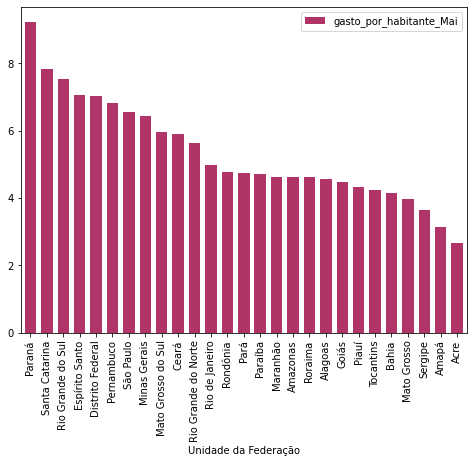

In [23]:
desafio1[["gasto_por_habitante_Mai"]].sort_values(by ="gasto_por_habitante_Mai", ascending = False).plot(kind='bar', stacked = False, figsize=(8,6),alpha=0.8, width=0.7,colormap="Spectral")

<AxesSubplot:xlabel='Unidade da Federação'>

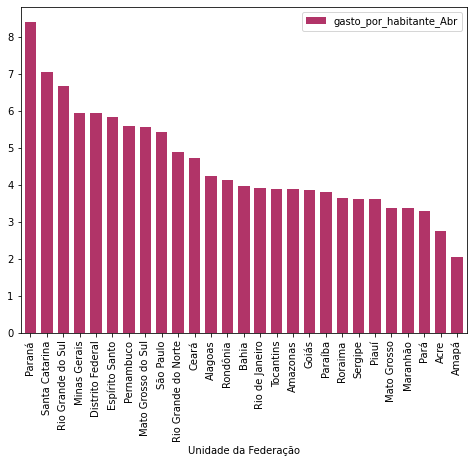

In [24]:
desafio1[["gasto_por_habitante_Abr"]].sort_values(by ="gasto_por_habitante_Abr", ascending = False).plot(kind='bar', stacked = False, figsize=(8,6),alpha=0.8, width=0.7,colormap="Spectral")

<AxesSubplot:xlabel='Unidade da Federação'>

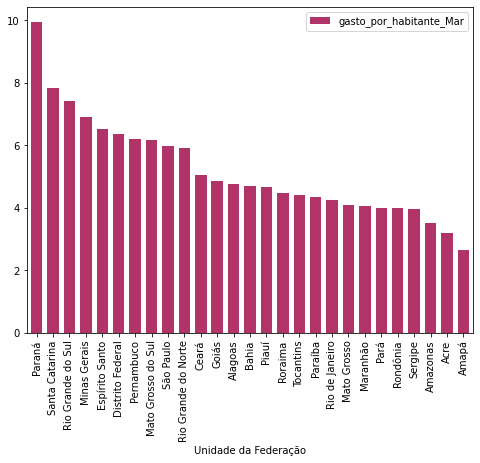

In [25]:
desafio1[["gasto_por_habitante_Mar"]].sort_values(by ="gasto_por_habitante_Mar", ascending = False).plot(kind='bar', stacked = False, figsize=(8,6),alpha=0.8, width=0.7,colormap="Spectral")

###### Parana, SC e RS sao os top 3 nos ultimos meses observados

#### Desafio 03 (Super Desafio Thiago): Plotar no mesmos gráficos do final da aula o mês anterior e o mês corrente, analisar e compartilhar suas hipóteses.

<AxesSubplot:xlabel='Unidade da Federação'>

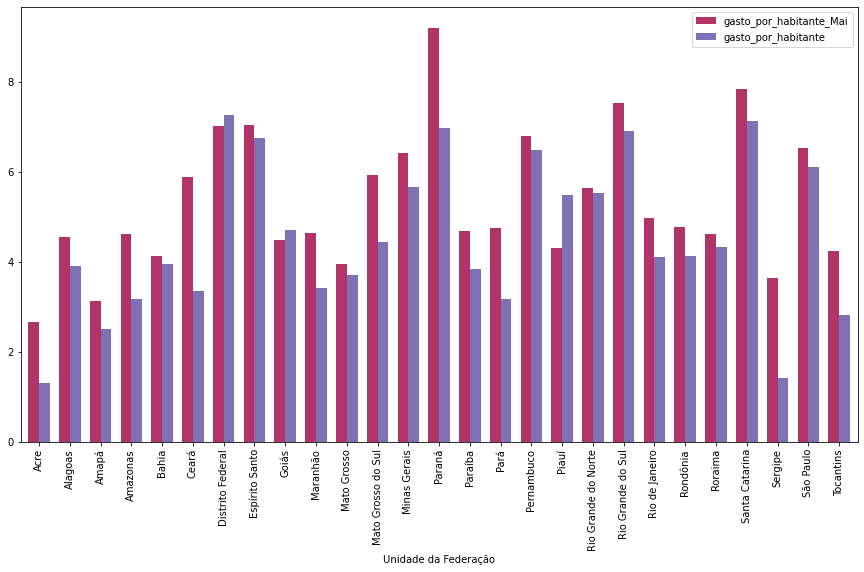

In [26]:
desafio1[["gasto_por_habitante_Mai","gasto_por_habitante"]].sort_index().plot(kind='bar', stacked = False, figsize=(15,8),alpha=0.8, width=0.7,colormap="Spectral")

###### Em geral na maioria das UF temos em maio o maior volume de gastos por habitante em relacao a junho 2020.

#### Desafio 04 (Próximo Vídeo): Analise os gráficos e tente chegar a hipóteses que explicam o que você está entendendo dos dados. Lembre-se que a conclusão é uma hipótese. E que esses dados serão alterados.

### Observando os ultimos meses Parana, SC e RS sao os paises que gastou mais por habitante no Brasil.
### Talvez um fator de alta de gastos na regiao SUL se de pelo aumento de casos da covid-19 no periodo.

## .INICIO AULA 3

In [27]:
df_gastos_sus.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, 11 Rondônia to 53 Distrito Federal
Columns: 279 entries, 1992/Mar to Total
dtypes: float64(157), object(122)
memory usage: 60.1+ KB


In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

df_gastos_sus = pd.read_csv('https://raw.githubusercontent.com/ibzoo/Bootcamp-DATA-SCIENCE/main/A160324189_28_143_208.csv', encoding = 'ISO-8859-1', 
                         skiprows = 3, skipfooter = 12, sep=';', thousands = '.', decimal = ',',engine="python")
df_gastos_sus.head(2)

#Criando dataframe ordenado por total apos Fev 2008

display(df_gastos_sus.head(1))

#define index
df_gastos_sus = df_gastos_sus.set_index('Unidade da Federação')

#Realiza o slice dos caracteres do index
df_gastos_sus.index = df_gastos_sus.index.str[3:]

#Ordena pelo total decrescente
ordenado_por_total = df_gastos_sus.sort_values(by = 'Total', ascending = False)

#Cria lista dos campos.
maior_2008 = ordenado_por_total.columns[127:-2]

#Filtra lista dos campos sem alterar o index
ordenado_por_total = ordenado_por_total[maior_2008]
ordenado_por_total.replace('-', 0, inplace = True)
ordenado_por_total = ordenado_por_total.astype(float)

display(ordenado_por_total.head(2))
display(ordenado_por_total.info())

,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,...,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,11 Rondônia,-,-,-,-,-,-,-,-,-,...,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,3556381.57,929129659.72


,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,...,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
São Paulo,172834914.73,170481849.56,170278285.95,172402180.59,175416595.83,179525002.10,179898070.22,180082203.71,191685220.08,190539738.80,...,303382527.10,282391773.21,272697695.04,301991167.67,271356784.04,276606288.92,251696362.66,302857660.98,299060851.62,282709570.31
Minas Gerais,70301089.50,79119005.51,79046322.41,79268070.12,79608652.53,82200224.47,80374117.08,82400146.79,88613476.60,84486996.11,...,166133803.32,152106660.17,152398599.06,158097903.98,141323175.61,147078556.29,126330649.86,136867275.75,135977571.87,120467187.34


<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, São Paulo to Amapá
Columns: 150 entries, 2008/Fev to 2020/Jul
dtypes: float64(150)
memory usage: 31.9+ KB


None

<AxesSubplot:ylabel='São Paulo'>

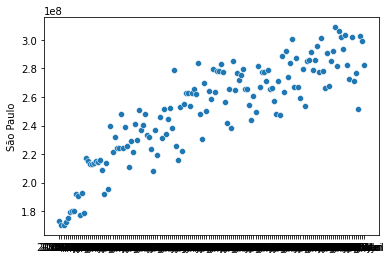

In [31]:
sns.scatterplot(x=ordenado_por_total.columns, y=ordenado_por_total.loc["São Paulo"])

In [32]:
mensal = ordenado_por_total.T / 1000000
mensal.head()

Unidade da Federação,São Paulo,Minas Gerais,Paraná,Rio Grande do Sul,Rio de Janeiro,Bahia,Pernambuco,Santa Catarina,Ceará,Goiás,...,Piauí,Alagoas,Mato Grosso,Amazonas,Sergipe,Tocantins,Rondônia,Acre,Roraima,Amapá
2008/Fev,172.83,70.30,48.86,45.90,44.12,33.41,26.22,24.41,27.64,18.15,...,9.71,8.11,7.93,7.93,4.64,5.05,1.94,1.74,0.77,1.28
2008/Mar,170.48,79.12,55.61,52.93,42.89,41.30,30.72,27.48,30.09,20.99,...,10.43,9.21,9.42,8.64,5.02,5.20,1.96,2.06,0.88,1.18
2008/Abr,170.28,79.05,56.12,51.97,45.30,42.83,30.59,27.81,31.38,21.05,...,10.23,10.47,9.39,8.53,5.27,5.34,2.14,2.06,0.90,1.40
2008/Mai,172.40,79.27,55.57,51.68,43.95,42.07,31.41,28.35,31.19,19.16,...,10.56,9.84,9.38,9.08,5.37,5.34,2.28,2.23,1.03,1.41
2008/Jun,175.42,79.61,56.09,53.76,44.10,39.91,28.95,28.99,29.46,20.33,...,10.47,10.29,9.45,8.65,4.98,5.40,2.62,2.11,0.94,1.42


### Desafio: use seu estado


<AxesSubplot:ylabel='Rio de Janeiro'>

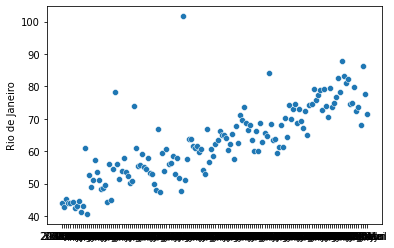

In [33]:
sns.scatterplot(data=mensal, x=mensal.index, y="Rio de Janeiro")

### Desafio: Formatar o eixo y StrMethodFormatter, colocar um título e colocar título nos 2 eixos. E alterar fonte (tamanho) dos títulos.

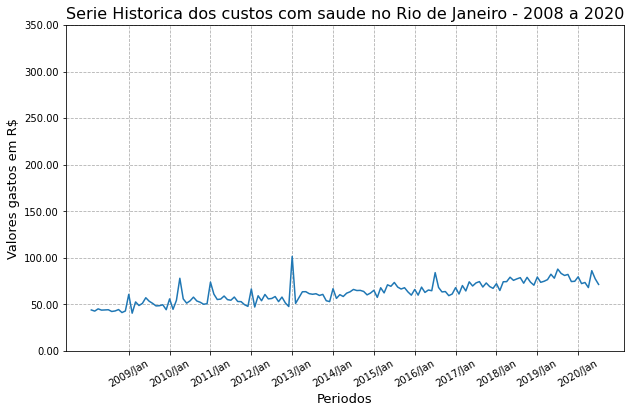

In [34]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=mensal, x=mensal.index, y="Rio de Janeiro")
plt.xticks(rotation=30)
plt.ylim(0, 350)
plt.xlabel('Periodos', {'fontsize': 13})
plt.ylabel('Valores gastos em R$', {'fontsize': 13})
plt.title('Serie Historica dos custos com saude no Rio de Janeiro - 2008 a 2020',{'fontsize': 16})
plt.grid(linestyle="--")

ax.xaxis.set_major_locator(ticker.IndexLocator(base=12, offset=11))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.show()

### Inicio da Aula 4

###### Necessario trabalhar com janelas para analisar melhor intervalos de datas

In [35]:
# Biblioteca para trabalhar com data e hora. por convencao nao tem alias
#import datetime
from datetime import date
display(date.today())
mensal.index
#OBS.: Estudar melhor a documentacao do DATETIME

datetime.date(2021, 6, 14)

Index(['2008/Fev', '2008/Mar', '2008/Abr', '2008/Mai', '2008/Jun', '2008/Jul',
       '2008/Ago', '2008/Set', '2008/Out', '2008/Nov',
       ...
       '2019/Out', '2019/Nov', '2019/Dez', '2020/Jan', '2020/Fev', '2020/Mar',
       '2020/Abr', '2020/Mai', '2020/Jun', '2020/Jul'],
      dtype='object', length=150)

In [36]:
meses = {
    'Jan': 1,
    'Fev': 2,
    'Mar': 3,
    'Abr': 4,
    'Mai': 5,
    'Jun': 6,
    'Jul': 7,
    'Ago': 8,
    'Set': 9,
    'Out': 10,
    'Nov': 11,
    'Dez': 12
}

def para_dia(ano_mes):
    ano: int = int(ano_mes[:4])
    mes: str = ano_mes[5:]
    mes_numero: int = meses[mes]
    return date(ano,mes_numero,1)

mensal.index = mensal.index.map(para_dia)
mensal.head()

Unidade da Federação,São Paulo,Minas Gerais,Paraná,Rio Grande do Sul,Rio de Janeiro,Bahia,Pernambuco,Santa Catarina,Ceará,Goiás,...,Piauí,Alagoas,Mato Grosso,Amazonas,Sergipe,Tocantins,Rondônia,Acre,Roraima,Amapá
2008-02-01,172.83,70.30,48.86,45.90,44.12,33.41,26.22,24.41,27.64,18.15,...,9.71,8.11,7.93,7.93,4.64,5.05,1.94,1.74,0.77,1.28
2008-03-01,170.48,79.12,55.61,52.93,42.89,41.30,30.72,27.48,30.09,20.99,...,10.43,9.21,9.42,8.64,5.02,5.20,1.96,2.06,0.88,1.18
2008-04-01,170.28,79.05,56.12,51.97,45.30,42.83,30.59,27.81,31.38,21.05,...,10.23,10.47,9.39,8.53,5.27,5.34,2.14,2.06,0.90,1.40
2008-05-01,172.40,79.27,55.57,51.68,43.95,42.07,31.41,28.35,31.19,19.16,...,10.56,9.84,9.38,9.08,5.37,5.34,2.28,2.23,1.03,1.41
2008-06-01,175.42,79.61,56.09,53.76,44.10,39.91,28.95,28.99,29.46,20.33,...,10.47,10.29,9.45,8.65,4.98,5.40,2.62,2.11,0.94,1.42


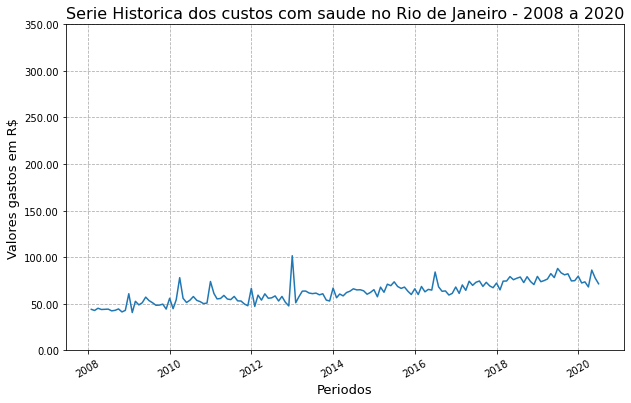

In [37]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=mensal, x=mensal.index, y="Rio de Janeiro")
plt.xticks(rotation=30)
plt.ylim(0, 350)
plt.xlabel('Periodos', {'fontsize': 13})
plt.ylabel('Valores gastos em R$', {'fontsize': 13})
plt.title('Serie Historica dos custos com saude no Rio de Janeiro - 2008 a 2020',{'fontsize': 16})
plt.grid(linestyle="--")

#ax.xaxis.set_major_locator(ticker.IndexLocator(base=12, offset=11))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.show()

In [38]:
mensal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 2008-02-01 to 2020-07-01
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   São Paulo            150 non-null    float64
 1   Minas Gerais         150 non-null    float64
 2   Paraná               150 non-null    float64
 3   Rio Grande do Sul    150 non-null    float64
 4   Rio de Janeiro       150 non-null    float64
 5   Bahia                150 non-null    float64
 6   Pernambuco           150 non-null    float64
 7   Santa Catarina       150 non-null    float64
 8   Ceará                150 non-null    float64
 9   Goiás                150 non-null    float64
 10  Pará                 150 non-null    float64
 11  Maranhão             150 non-null    float64
 12  Espírito Santo       150 non-null    float64
 13  Rio Grande do Norte  150 non-null    float64
 14  Paraíba              150 non-null    float64
 15  Distrito Federal     150 non-

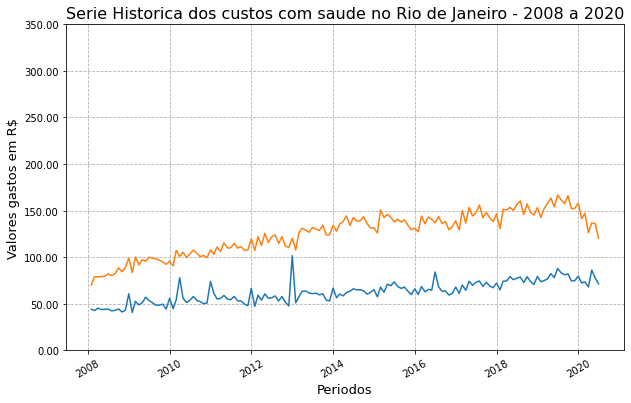

In [39]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=mensal, x=mensal.index, y="Rio de Janeiro")
ax = sns.lineplot(data=mensal, x=mensal.index, y="Minas Gerais")
plt.xticks(rotation=30)
plt.ylim(0, 350)
plt.xlabel('Periodos', {'fontsize': 13})
plt.ylabel('Valores gastos em R$', {'fontsize': 13})
plt.title('Serie Historica dos custos com saude no Rio de Janeiro - 2008 a 2020',{'fontsize': 16})
plt.grid(linestyle="--")

#ax.xaxis.set_major_locator(ticker.IndexLocator(base=12, offset=11))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.show()

In [40]:
mensal.head()

Unidade da Federação,São Paulo,Minas Gerais,Paraná,Rio Grande do Sul,Rio de Janeiro,Bahia,Pernambuco,Santa Catarina,Ceará,Goiás,...,Piauí,Alagoas,Mato Grosso,Amazonas,Sergipe,Tocantins,Rondônia,Acre,Roraima,Amapá
2008-02-01,172.83,70.30,48.86,45.90,44.12,33.41,26.22,24.41,27.64,18.15,...,9.71,8.11,7.93,7.93,4.64,5.05,1.94,1.74,0.77,1.28
2008-03-01,170.48,79.12,55.61,52.93,42.89,41.30,30.72,27.48,30.09,20.99,...,10.43,9.21,9.42,8.64,5.02,5.20,1.96,2.06,0.88,1.18
2008-04-01,170.28,79.05,56.12,51.97,45.30,42.83,30.59,27.81,31.38,21.05,...,10.23,10.47,9.39,8.53,5.27,5.34,2.14,2.06,0.90,1.40
2008-05-01,172.40,79.27,55.57,51.68,43.95,42.07,31.41,28.35,31.19,19.16,...,10.56,9.84,9.38,9.08,5.37,5.34,2.28,2.23,1.03,1.41
2008-06-01,175.42,79.61,56.09,53.76,44.10,39.91,28.95,28.99,29.46,20.33,...,10.47,10.29,9.45,8.65,4.98,5.40,2.62,2.11,0.94,1.42


In [41]:
mensal.reset_index()

Unidade da Federação,index,São Paulo,Minas Gerais,Paraná,Rio Grande do Sul,Rio de Janeiro,Bahia,Pernambuco,Santa Catarina,Ceará,...,Piauí,Alagoas,Mato Grosso,Amazonas,Sergipe,Tocantins,Rondônia,Acre,Roraima,Amapá
0,2008-02-01,172.83,70.30,48.86,45.90,44.12,33.41,26.22,24.41,27.64,...,9.71,8.11,7.93,7.93,4.64,5.05,1.94,1.74,0.77,1.28
1,2008-03-01,170.48,79.12,55.61,52.93,42.89,41.30,30.72,27.48,30.09,...,10.43,9.21,9.42,8.64,5.02,5.20,1.96,2.06,0.88,1.18
2,2008-04-01,170.28,79.05,56.12,51.97,45.30,42.83,30.59,27.81,31.38,...,10.23,10.47,9.39,8.53,5.27,5.34,2.14,2.06,0.90,1.40
3,2008-05-01,172.40,79.27,55.57,51.68,43.95,42.07,31.41,28.35,31.19,...,10.56,9.84,9.38,9.08,5.37,5.34,2.28,2.23,1.03,1.41
4,2008-06-01,175.42,79.61,56.09,53.76,44.10,39.91,28.95,28.99,29.46,...,10.47,10.29,9.45,8.65,4.98,5.40,2.62,2.11,0.94,1.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,2020-03-01,276.61,147.08,114.48,84.65,73.59,70.34,59.63,56.71,46.40,...,15.32,16.00,14.44,14.77,9.19,7.03,7.17,2.86,2.81,2.29
146,2020-04-01,251.70,126.33,96.73,76.29,68.16,59.11,53.84,51.18,43.47,...,11.88,14.24,11.94,16.33,8.40,6.20,7.42,2.47,2.30,1.77
147,2020-05-01,302.86,136.87,106.10,86.08,86.28,61.76,65.42,56.84,54.20,...,14.18,15.25,13.98,19.44,8.45,6.73,8.58,2.38,2.91,2.70
148,2020-06-01,299.06,135.98,92.90,89.02,77.60,65.16,68.15,56.50,42.15,...,15.38,14.28,14.59,17.51,6.71,5.02,9.19,2.20,3.22,2.70


In [42]:
# Dobrar tabela. UF em linha. 
# O parametro para o melt sera as unicas variaveis que se manteram intacta
mensal_aberto = mensal.reset_index().melt(id_vars = ['index'], value_vars = mensal.columns)
mensal_aberto.columns = ["dia_mes_ano", "uf", "gasto"]
mensal_aberto['dia_mes_ano'] = mensal_aberto['dia_mes_ano'].astype('datetime64')
mensal_aberto.columns = ['dia_mes_ano', 'uf', 'gasto']
mensal_aberto.head()

,dia_mes_ano,uf,gasto
0,2008-02-01,São Paulo,172.83
1,2008-03-01,São Paulo,170.48
2,2008-04-01,São Paulo,170.28
3,2008-05-01,São Paulo,172.40
4,2008-06-01,São Paulo,175.42


### Desafio 01: Estudar a documentação DateTime do Python, escolha dois métodos para se aprofundar faça alguns testes e compartilhe o conhecimento adquirido com seus colegas no Discord.

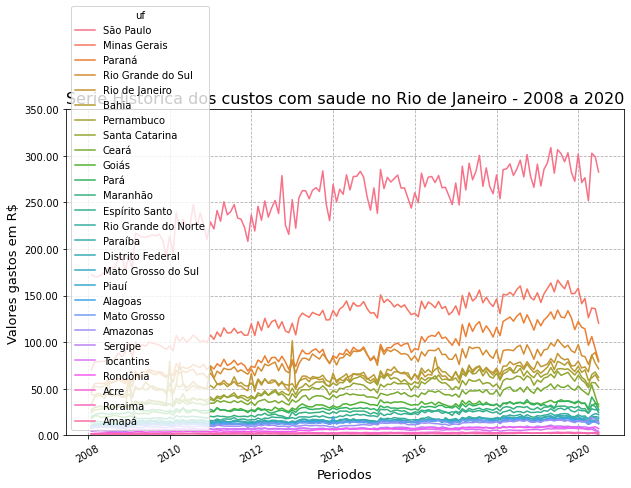

In [43]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=mensal_aberto, x='dia_mes_ano', y='gasto', hue = 'uf')
plt.xticks(rotation=30)
plt.ylim(0, 350)
plt.xlabel('Periodos', {'fontsize': 13})
plt.ylabel('Valores gastos em R$', {'fontsize': 13})
plt.title('Serie Historica dos custos com saude no Rio de Janeiro - 2008 a 2020',{'fontsize': 16})
plt.grid(linestyle="--")

#ax.xaxis.set_major_locator(ticker.IndexLocator(base=12, offset=11))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.show()

### Desafio 02: Aprendemos a usar o Melt para desnormalizar sua base de dados, agora o desafio é realizar o processo contrário, voltar atrás partindo do mensal_aberto chegando no mensal.

In [44]:
#usando o metodo Pivot para nornalizar a tabela

mensal_expandido = mensal_aberto.pivot(index ='dia_mes_ano' , columns = 'uf', values = 'gasto')
mensal_expandido.head()

uf,Acre,Alagoas,Amapá,Amazonas,Bahia,Ceará,Distrito Federal,Espírito Santo,Goiás,Maranhão,...,Piauí,Rio Grande do Norte,Rio Grande do Sul,Rio de Janeiro,Rondônia,Roraima,Santa Catarina,Sergipe,São Paulo,Tocantins
dia_mes_ano,,,,,,,,,,,,,,,,,,,,,
2008-02-01,1.74,8.11,1.28,7.93,33.41,27.64,10.22,10.03,18.15,13.45,...,9.71,9.11,45.90,44.12,1.94,0.77,24.41,4.64,172.83,5.05
2008-03-01,2.06,9.21,1.18,8.64,41.30,30.09,11.63,12.26,20.99,14.75,...,10.43,10.13,52.93,42.89,1.96,0.88,27.48,5.02,170.48,5.20
2008-04-01,2.06,10.47,1.40,8.53,42.83,31.38,11.92,12.45,21.05,15.15,...,10.23,10.96,51.97,45.30,2.14,0.90,27.81,5.27,170.28,5.34
2008-05-01,2.23,9.84,1.41,9.08,42.07,31.19,11.90,11.79,19.16,14.54,...,10.56,11.03,51.68,43.95,2.28,1.03,28.35,5.37,172.40,5.34
2008-06-01,2.11,10.29,1.42,8.65,39.91,29.46,11.97,11.89,20.33,14.55,...,10.47,10.45,53.76,44.10,2.62,0.94,28.99,4.98,175.42,5.40


### Desafio 03: Melhorar o gráfico da distribuição do gráfico:

In [45]:
#### Escolha apenas alguns estados.
uf = ['Rio Grande do Norte', 'Mato Grosso','Alagoas', 'Piauí', 'Distrito Federal']
df_mensal = mensal_expandido[uf]
df_mensal = df_mensal.reset_index().melt(id_vars = ['dia_mes_ano'], value_vars = df_mensal.columns)
df_mensal.head()

,dia_mes_ano,uf,value
0,2008-02-01,Rio Grande do Norte,9.11
1,2008-03-01,Rio Grande do Norte,10.13
2,2008-04-01,Rio Grande do Norte,10.96
3,2008-05-01,Rio Grande do Norte,11.03
4,2008-06-01,Rio Grande do Norte,10.45


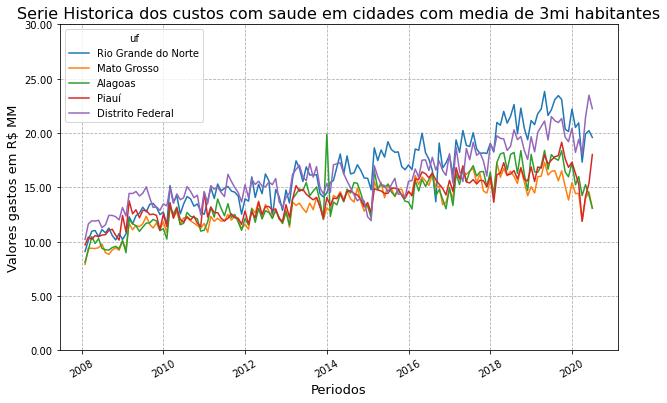

In [46]:
#### Mude a palete de cores.
#### Posicione a legenda de forma mais adequada.
#### Adicione título principal e nos eixos x e y.
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=df_mensal, x='dia_mes_ano', y='value', hue = 'uf')
plt.xticks(rotation=30)
plt.ylim(0, 30)
plt.xlabel('Periodos', {'fontsize': 13})
plt.ylabel('Valores gastos em R$ MM', {'fontsize': 13})
plt.title('Serie Historica dos custos com saude em cidades com media de 3mi habitantes',{'fontsize': 16})
plt.grid(linestyle="--")

#ax.xaxis.set_major_locator(ticker.IndexLocator(base=12, offset=11))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.show()

### INICIO AULA 4

In [47]:
mensal_aberto.head()

,dia_mes_ano,uf,gasto
0,2008-02-01,São Paulo,172.83
1,2008-03-01,São Paulo,170.48
2,2008-04-01,São Paulo,170.28
3,2008-05-01,São Paulo,172.40
4,2008-06-01,São Paulo,175.42


In [48]:
mensal_aberto["dia_mes_ano"][0]

Timestamp('2008-02-01 00:00:00')

In [49]:
mensal_aberto["dia_mes_ano"].head()

0   2008-02-01
1   2008-03-01
2   2008-04-01
3   2008-05-01
4   2008-06-01
Name: dia_mes_ano, dtype: datetime64[ns]

In [50]:
mensal_aberto["mes"] = mensal_aberto["dia_mes_ano"].dt.month
mensal_aberto["ano"] = mensal_aberto["dia_mes_ano"].dt.year
mensal_aberto.head()

,dia_mes_ano,uf,gasto,mes,ano
0,2008-02-01,São Paulo,172.83,2,2008
1,2008-03-01,São Paulo,170.48,3,2008
2,2008-04-01,São Paulo,170.28,4,2008
3,2008-05-01,São Paulo,172.40,5,2008
4,2008-06-01,São Paulo,175.42,6,2008


In [51]:
mensal_aberto.query("uf=='São Paulo'")

,dia_mes_ano,uf,gasto,mes,ano
0,2008-02-01,São Paulo,172.83,2,2008
1,2008-03-01,São Paulo,170.48,3,2008
2,2008-04-01,São Paulo,170.28,4,2008
3,2008-05-01,São Paulo,172.40,5,2008
4,2008-06-01,São Paulo,175.42,6,2008
...,...,...,...,...,...
145,2020-03-01,São Paulo,276.61,3,2020
146,2020-04-01,São Paulo,251.70,4,2020
147,2020-05-01,São Paulo,302.86,5,2020
148,2020-06-01,São Paulo,299.06,6,2020


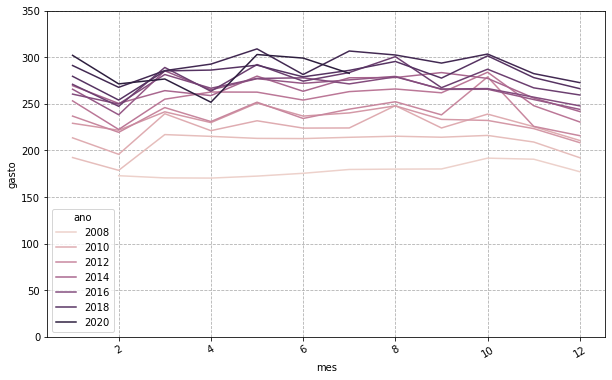

In [52]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=mensal_aberto.query("uf=='São Paulo'"), x="mes", y="gasto", hue="ano")
plt.xticks(rotation=30)
plt.ylim(0, 350)
plt.grid(linestyle="--")
plt.show()

In [53]:
dias_por_mes = {
    1 : 31,
    2 : 28,
    3 : 31,
    4 : 30,
    5 : 31,
    6 : 30,
    7 : 31,
    8 : 31,
    9 : 30,
    10 : 31,
    11 : 30,
    12 : 31
}

In [54]:
mensal_aberto['gasto_diario'] = mensal_aberto['gasto'] / mensal_aberto['mes'].map(dias_por_mes)
mensal_aberto.head()

,dia_mes_ano,uf,gasto,mes,ano,gasto_diario
0,2008-02-01,São Paulo,172.83,2,2008,6.17
1,2008-03-01,São Paulo,170.48,3,2008,5.50
2,2008-04-01,São Paulo,170.28,4,2008,5.68
3,2008-05-01,São Paulo,172.40,5,2008,5.56
4,2008-06-01,São Paulo,175.42,6,2008,5.85


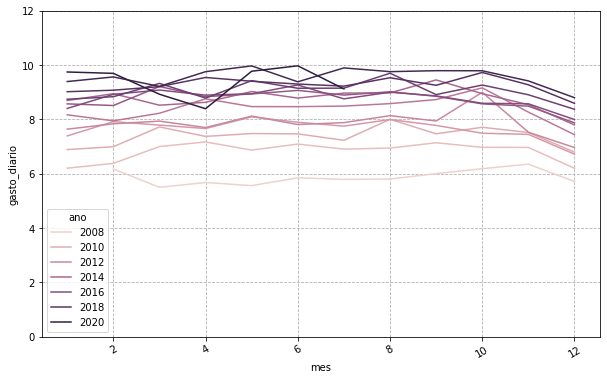

In [55]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=mensal_aberto.query("uf=='São Paulo'"), x="mes", y="gasto_diario", hue="ano")
plt.xticks(rotation=30)
plt.ylim(0, 12)
plt.grid(linestyle="--")
plt.show()

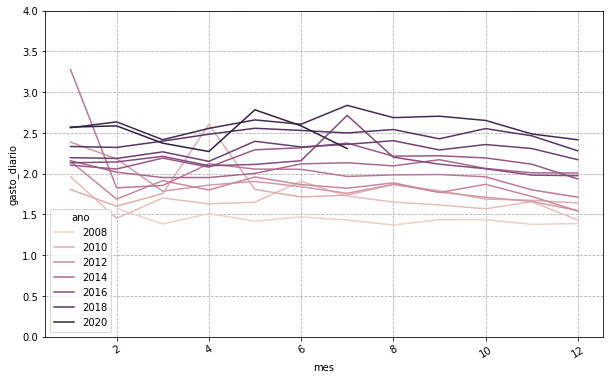

In [56]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=mensal_aberto.query("uf=='Rio de Janeiro'"), x="mes", y="gasto_diario", hue="ano")
plt.xticks(rotation=30)
plt.ylim(0, 4)
plt.grid(linestyle="--")
plt.show()

### Desafio: cores melhores (palete), títulos, ticks de mês com nome bonitinho (inglês? português?). Estado que você quiser estudar.


In [57]:
#Mes bonitinho em en
meses = {
    1 : 'Jan',
    2 : 'Feb',
    3 : 'Mar',
    4 : 'Apr',
    5 : 'May',
    6 : 'Jun',
    7 : 'Jul',
    8 : 'Aug',
    9 : 'Sep',
    10 : 'Oct',
    11 : 'Nov',
    12 : 'Dec'
}
mensal_aberto = mensal_aberto.sort_values(by = 'mes')
mensal_aberto['mes_'] = mensal_aberto['mes'].map(meses)
mensal_aberto.head()

,dia_mes_ano,uf,gasto,mes,ano,gasto_diario,mes_
1271,2014-01-01,Ceará,43.41,1,2014,1.40,Jan
431,2019-01-01,Paraná,124.16,1,2019,4.01,Jan
3509,2013-01-01,Rondônia,4.47,1,2013,0.14,Jan
2033,2015-01-01,Rio Grande do Norte,15.83,1,2015,0.51,Jan
245,2016-01-01,Minas Gerais,131.12,1,2016,4.23,Jan


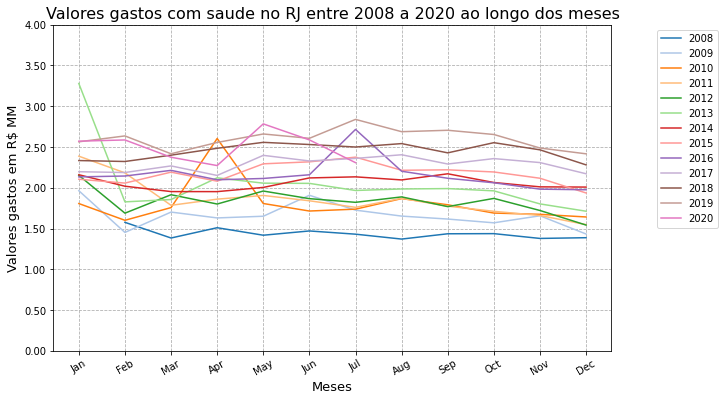

In [71]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=mensal_aberto.query("uf=='Rio de Janeiro'"), x="mes_", y='gasto_diario', hue = 'ano', palette="tab20",markers=True, dashes=False)
plt.xticks(rotation=30)
plt.ylim(0, 4)
plt.xlabel('Meses', {'fontsize': 13})
plt.ylabel('Valores gastos em R$ MM', {'fontsize': 13})
plt.title('Valores gastos com saude no RJ entre 2008 a 2020 ao longo dos meses',{'fontsize': 16})
plt.legend(loc = 1,ncol = 1,bbox_to_anchor=(1.2, 1))
plt.grid(linestyle="--")

#ax.xaxis.set_major_locator(ticker.IndexLocator(base=12, offset=11))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.show()

### Desafio: pegar dois estados de climas diferentes (estações de chuva diferente) e plotar as diversas linhas deles. Comparar picos etc. Gerar gráficos separados e conjuntos.

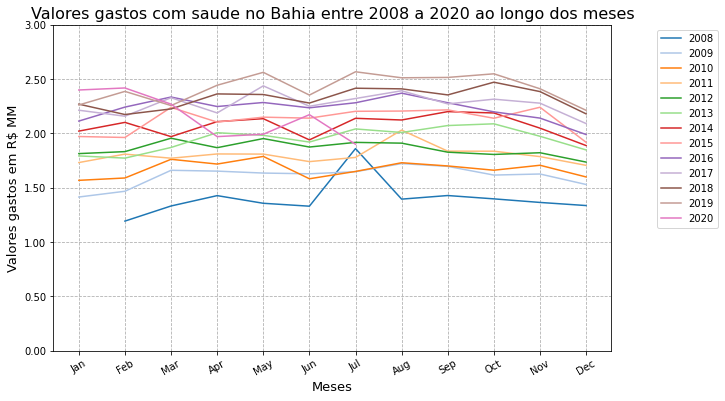

In [100]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=mensal_aberto.query("uf=='Bahia'"), x="mes_", y='gasto_diario', hue = 'ano', palette="tab20",markers=True, dashes=False)
plt.xticks(rotation=30)
plt.ylim(0, 3)
plt.xlabel('Meses', {'fontsize': 13})
plt.ylabel('Valores gastos em R$ MM', {'fontsize': 13})
plt.title('Valores gastos com saude no Bahia entre 2008 a 2020 ao longo dos meses',{'fontsize': 16})
plt.legend(loc = 1,ncol = 1,bbox_to_anchor=(1.2, 1))
plt.grid(linestyle="--")

#ax.xaxis.set_major_locator(ticker.IndexLocator(base=12, offset=11))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.show()

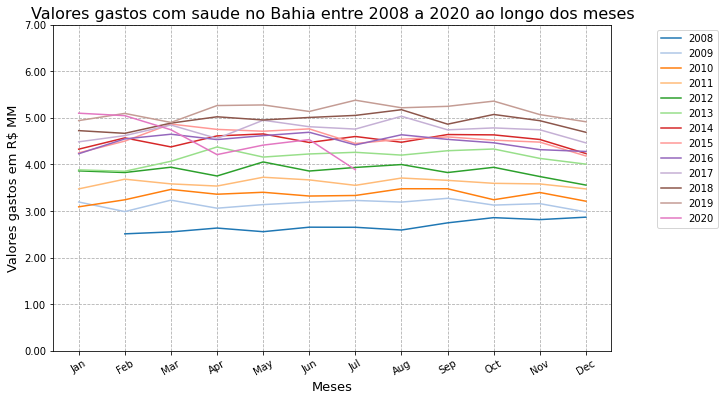

In [103]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=mensal_aberto.query("uf=='Minas Gerais'"), x="mes_", y='gasto_diario', hue = 'ano', palette="tab20",markers=True, dashes=False)
plt.xticks(rotation=30)
plt.ylim(0, 7)
plt.xlabel('Meses', {'fontsize': 13})
plt.ylabel('Valores gastos em R$ MM', {'fontsize': 13})
plt.title('Valores gastos com saude no Bahia entre 2008 a 2020 ao longo dos meses',{'fontsize': 16})
plt.legend(loc = 1,ncol = 1,bbox_to_anchor=(1.2, 1))
plt.grid(linestyle="--")

#ax.xaxis.set_major_locator(ticker.IndexLocator(base=12, offset=11))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.show()

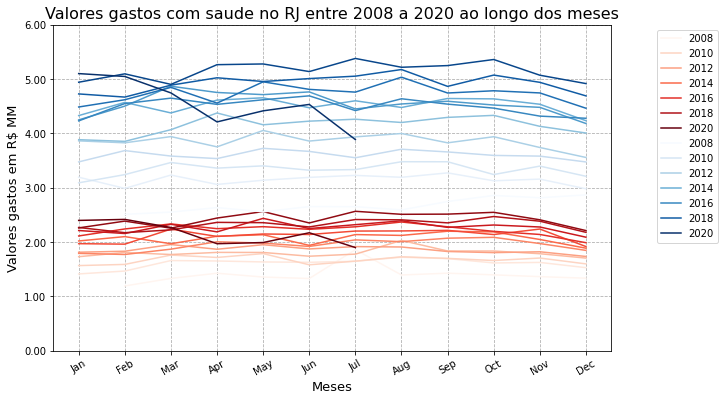

In [97]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=mensal_aberto.query("uf=='Bahia'"), x="mes_", y='gasto_diario', hue = 'ano',palette="Reds",markers=True, dashes=False)
ax = sns.lineplot(data=mensal_aberto.query("uf=='Minas Gerais'"), x="mes_", y='gasto_diario', hue = 'ano', palette="Blues",markers=True, dashes=False)

plt.xticks(rotation=30)
plt.ylim(0, 6)
plt.xlabel('Meses', {'fontsize': 13})
plt.ylabel('Valores gastos em R$ MM', {'fontsize': 13})
plt.title('Valores gastos com saude no RJ entre 2008 a 2020 ao longo dos meses',{'fontsize': 16})
plt.legend(loc = 1,ncol = 1,bbox_to_anchor=(1.2, 1))
plt.grid(linestyle="--")

#ax.xaxis.set_major_locator(ticker.IndexLocator(base=12, offset=11))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.show()